In [2]:
%matplotlib inline
import pylab as pl
pl.style.use('dark_background')
pl.rcParams['font.size'] = 14
pl.rcParams['image.origin'] = 'lower'
pl.rcParams['figure.dpi'] = 100

In [3]:
import numpy as np

In [4]:
nu = np.linspace(-10*np.pi, 10*np.pi, 10000)
tee = np.fft.fftfreq(nu.size) / (nu[1]-nu[0])
inds = np.argsort(tee)

# Exercises

Without formally evaluating the Fourier integral, draw by hand the functions below on the left side of the
page, and their Fourier transforms on the right side of the page. (Note: $t_0$ and $f_0$ indicate constants, not
variables.)

 1. $A\cos(2 f_0t)$
 1. $A\sin(2 f_0t)$
 1. $\mathrm{sinc}(2 ft_0)$
 1. $\mathrm{sinc}^2(2 ft_0)$
 1. $\cos(2\cdot f t_0) \mathrm{sinc}(2 ft_0)$
 1. $e^{−t^2} \cos(2 f_0t)$

Answer key, kinda (still should run these to double-check the normalizations & locations)

# 1. $A\cos(2 f_0t)$

FT
$$ A \left[ \delta\left(f + \frac{f_0}{\pi}\right) + \delta\left(f - \frac{f_0}{\pi}\right)
\right]$$

# 2. $A \sin (2 f_0 t)$

FT
$$ A i \left[ \delta\left(f + \frac{f_0}{\pi}\right) - \delta\left(f - \frac{f_0}{\pi}\right)
\right]$$

# 3. $A \mathrm{sinc}(2 f t_0)$

FT
$$A \left\{1 \mathrm{~if~} |t| < \frac{t_0}{\pi} \mathrm{~else~} 0 \right\}$$

$$\int_{-\infty}^\infty \mathrm{sinc} x dx = \pi$$
$$\int_{-\infty}^\infty \mathrm{sinc} \frac{x}{\pi} dx = 1$$

# 4. $A \mathrm{sinc}^2(2 f t_0)$

Function: sinc, but all-positive

FT:
$$A \left\{\left[\pi^2 t \mathrm{~if~} 0 > t > -\frac{t_0}{\pi}\right] - \left[\pi^2 t \mathrm{~if~} 0 < t < \frac{t_0}{\pi}\right] \right\}$$


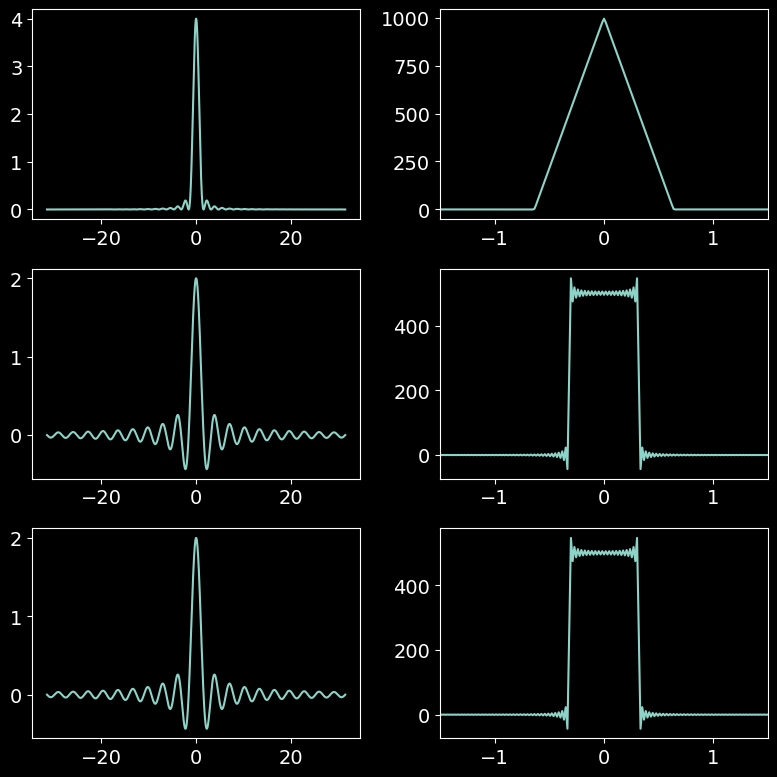

In [11]:
t0 = 1
y = (np.sin(2*nu*t0)/nu)**2

pl.figure(figsize=(8,8))
pl.subplot(3,2,1)
pl.plot(nu, y)

pl.subplot(3,2,2)
pl.plot(tee[inds], np.fft.fft(np.fft.fftshift(y)).real[inds])
pl.xlim(-1.5,1.5)

pl.subplot(3,2,3)
y2 = (np.sin(2*nu*t0)/nu)
pl.plot(nu, y2)

pl.subplot(3,2,4)
pl.plot(tee[inds], np.fft.fft(np.fft.fftshift(y2)).real[inds])
pl.xlim(-1.5,1.5)

pl.subplot(3,2,5)
y3 = np.sin(2*nu*t0) / nu
pl.plot(nu, y3)

pl.subplot(3,2,6)
pl.plot(tee[inds], np.fft.fft(np.fft.fftshift(y3)).real[inds])
pl.xlim(-1.5,1.5);
pl.tight_layout();

# 5. $\cos(2\cdot f t_0) \mathrm{sinc}(2 ft_0)$

Function: sinc


FT: tophat

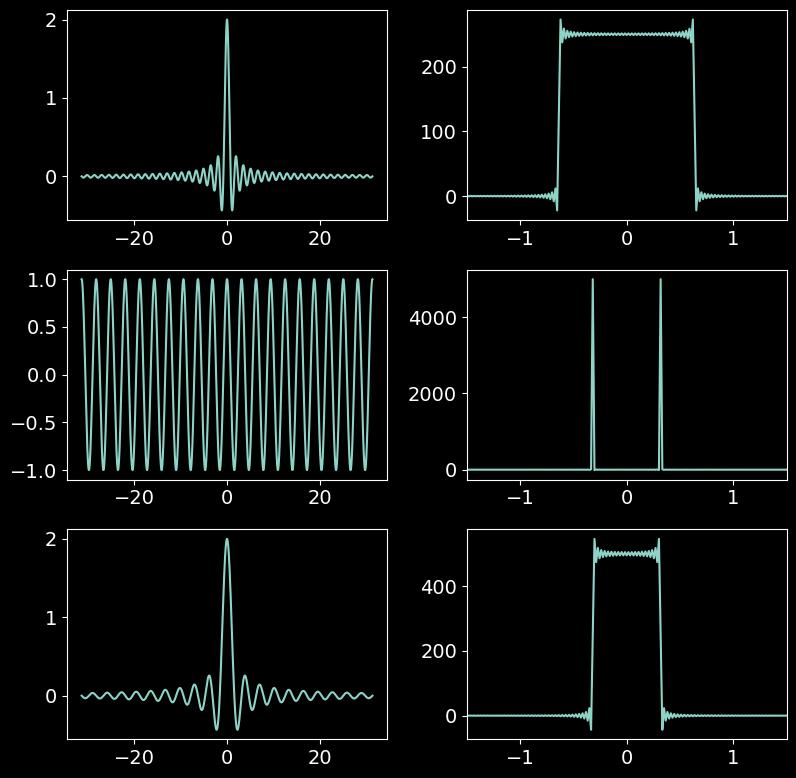

In [5]:
t0 = 1
y = np.cos(2*nu*t0) * np.sin(2*nu*t0)/nu

pl.figure(figsize=(8,8))
pl.subplot(3,2,1)
pl.plot(nu, y)

pl.subplot(3,2,2)
pl.plot(tee[inds], np.fft.fft(np.fft.fftshift(y)).real[inds])
pl.xlim(-1.5,1.5)

pl.subplot(3,2,3)
y2 = np.cos(2*nu*t0)
pl.plot(nu, y2)

pl.subplot(3,2,4)
pl.plot(tee[inds], np.fft.fft(np.fft.fftshift(y2)).real[inds])
pl.xlim(-1.5,1.5)

pl.subplot(3,2,5)
y3 = np.sin(2*nu*t0) / nu
pl.plot(nu, y3)

pl.subplot(3,2,6)
pl.plot(tee[inds], np.fft.fft(np.fft.fftshift(y3)).real[inds])
pl.xlim(-1.5,1.5);
pl.tight_layout();

# 6. $\cos(4\cdot f t_0) \mathrm{sinc}(2 ft_0)$

Function: kinda hard to draw, just multiply cosine * sinc - looks like a sinc but with more wiggles


FT: two top-hat functions with width $\Delta t = \frac{t_0}{\pi}$ at $t = \pm \frac{2 t_0}{\pi}$.


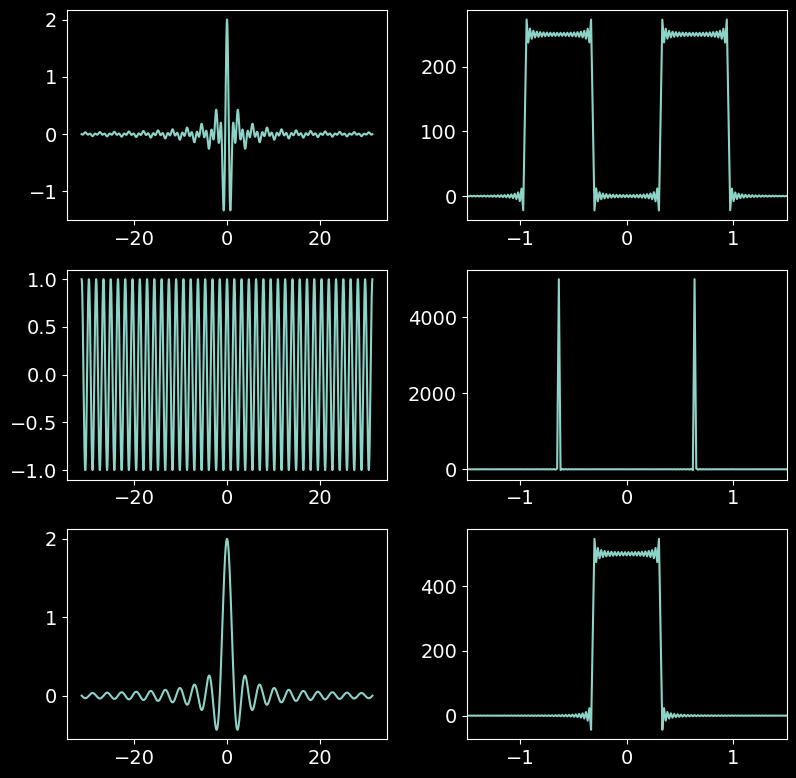

In [6]:
t0 = 1
y = np.cos(4*nu*t0) * np.sin(2*nu*t0)/nu

pl.figure(figsize=(8,8))
pl.subplot(3,2,1)
pl.plot(nu, y)

pl.subplot(3,2,2)
pl.plot(tee[inds], np.fft.fft(np.fft.fftshift(y)).real[inds])
pl.xlim(-1.5,1.5)

pl.subplot(3,2,3)
y2 = np.cos(4*nu*t0)
pl.plot(nu, y2)

pl.subplot(3,2,4)
pl.plot(tee[inds], np.fft.fft(np.fft.fftshift(y2)).real[inds])
pl.xlim(-1.5,1.5)

pl.subplot(3,2,5)
y3 = np.sin(2*nu*t0) / nu
pl.plot(nu, y3)

pl.subplot(3,2,6)
pl.plot(tee[inds], np.fft.fft(np.fft.fftshift(y3)).real[inds])
pl.xlim(-1.5,1.5);
pl.tight_layout();

# 7.  $e^{−t^2} \cos(2 f_0t)$

Function: cos times Gaussian

FT:
Two Gaussian functions at $f = \pm \frac{f_0}{\pi}$, with width $\sigma=\frac{1}{\pi \sqrt{2}}$

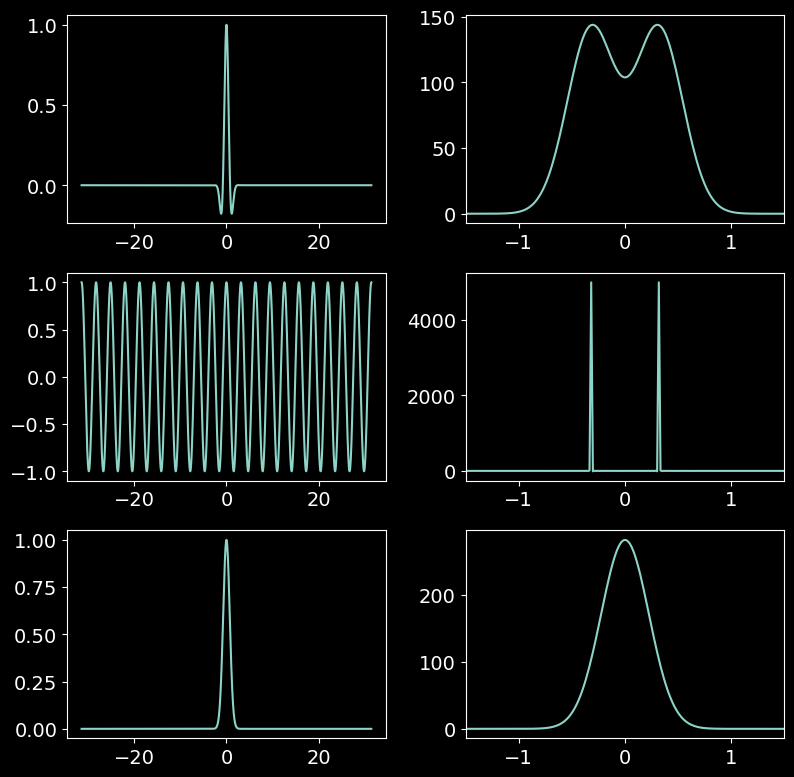

In [8]:
t0 = 1
y = np.exp(-nu**2) * np.cos(2*nu*t0)

pl.figure(figsize=(8,8))
pl.subplot(3,2,1)
pl.plot(nu, y)

pl.subplot(3,2,2)
pl.plot(tee[inds], np.fft.fft(np.fft.fftshift(y)).real[inds])
pl.xlim(-1.5,1.5)

pl.subplot(3,2,3)
y2 = np.cos(2*nu*t0)
pl.plot(nu, y2)

pl.subplot(3,2,4)
pl.plot(tee[inds], np.fft.fft(np.fft.fftshift(y2)).real[inds])
pl.xlim(-1.5,1.5)

pl.subplot(3,2,5)
y3 = np.exp(-nu**2)
pl.plot(nu, y3)

pl.subplot(3,2,6)
pl.plot(tee[inds], np.fft.fft(np.fft.fftshift(y3)).real[inds])
pl.xlim(-1.5,1.5);
pl.tight_layout();

# 8.  $t \cos(2 f_0t)$

Function: t times cosine

FT(t) ~ truncated sine

FT:
triple sinc?

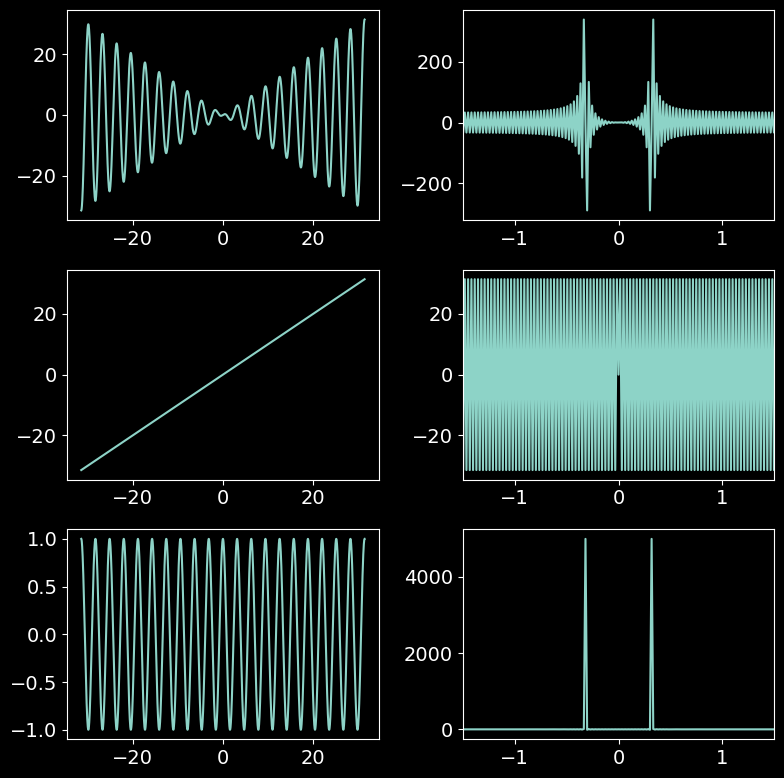

In [12]:
t0 = 1
y = nu * np.cos(2*nu*t0)

pl.figure(figsize=(8,8))
pl.subplot(3,2,1)
pl.plot(nu, y)

pl.subplot(3,2,2)
pl.plot(tee[inds], np.fft.fft(np.fft.fftshift(y)).real[inds])
pl.xlim(-1.5,1.5)

pl.subplot(3,2,3)
y2 = nu
pl.plot(nu, y2)

pl.subplot(3,2,4)
pl.plot(tee[inds], np.fft.fft(np.fft.fftshift(y2)).real[inds])
pl.xlim(-1.5,1.5)

pl.subplot(3,2,5)
y3 = np.cos(2*nu*t0)
pl.plot(nu, y3)

pl.subplot(3,2,6)
pl.plot(tee[inds], np.fft.fft(np.fft.fftshift(y3)).real[inds])
pl.xlim(-1.5,1.5);
pl.tight_layout();